# Imports


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Load Dataset & Train / Test Split

In [13]:
dataset = pd.read_csv("../data/Salary_Data.csv")
# Grabs the first column as a 2D array (Matrix)
X = dataset.iloc[:,:-1].values
# Grabs the last column as the target (Vector)
y = dataset.iloc[:, -1].values

# Splits data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Helper Function

In [14]:
def plot_regression_results(X_train, y_train, X_test, y_test, model, title, transform=None, save_path=None):
    X_plot = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1)
    X_plot_transformed = transform(X_plot) if transform else X_plot
    y_plot = model.predict(X_plot_transformed)

    plt.scatter(X_train, y_train, color="blue", label="Train data")
    plt.scatter(X_test, y_test, color="red", label="Test data")
    plt.plot(X_plot, y_plot, color="black", label="Model prediction")

    plt.title(title)
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    if save_path:
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
    plt.show()


# Regression Models

## 1. Linear Regrsssion

Linear Regression | MSE: 49830096.86, R2: 0.90
Plot saved to ../images/LinearRegression.png


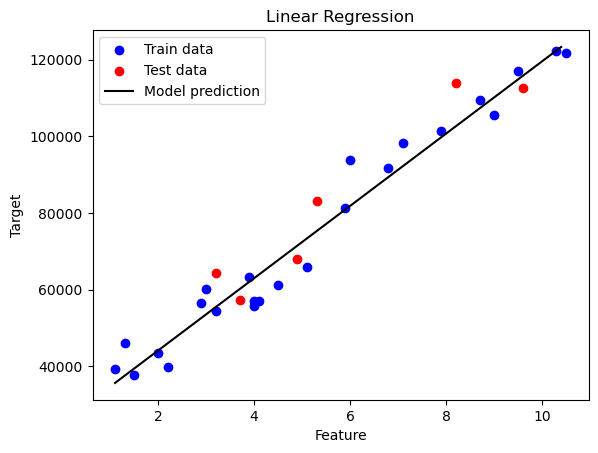

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_test_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Linear Regression | MSE: {mse:.2f}, R2: {r2:.2f}")

plot_regression_results(
    X_train, y_train,
    X_test, y_test,
    lin_reg,
    "Linear Regression",
     save_path="../images/LinearRegression.png"
)


In [16]:
print(os.getcwd())

C:\Users\User\Desktop\GIT-HUB\ml-model-comparisons\notebooks


print(os.getcwd())## 2.Polynomial Regression

Polynomial Regression | MSE: 49557837.26, R2: 0.90
Plot saved to ../images/PolynomialRegression.png


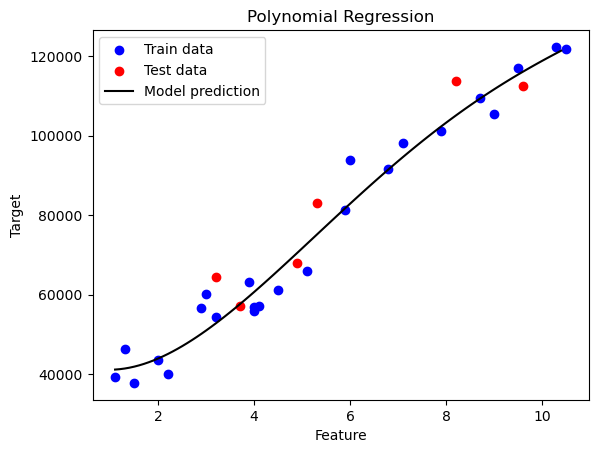

In [17]:
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_test_pred = poly_reg.predict(X_test_poly)

print(
    f"Polynomial Regression | "
    f"MSE: {mean_squared_error(y_test, y_test_pred):.2f}, "
    f"R2: {r2_score(y_test, y_test_pred):.2f}"
)

plot_regression_results(
    X_train, y_train,
    X_test, y_test,
    poly_reg,
    "Polynomial Regression",
    transform=poly.transform,
     save_path="../images/PolynomialRegression.png"
)


## 3. Support Vector Regression

SVR | MSE: 54331632.87, R2: 0.89


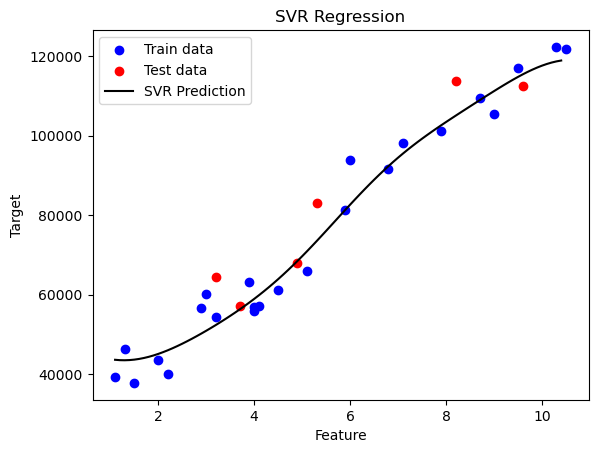

In [18]:
# 1. Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()
X_test_scaled = sc_X.transform(X_test)

# 2. Training the SVR Model
svr_reg = SVR(kernel='rbf') # RBF is the most common non-linear kernel
svr_reg.fit(X_train_scaled, y_train_scaled)

# 3. Predicting and Inverse Transforming
# We predict on scaled X, then convert back to original salary scale
y_pred_scaled = svr_reg.predict(X_test_scaled)
y_test_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

print(
    f"SVR | "
    f"MSE: {mean_squared_error(y_test, y_test_pred):.2f}, "
    f"R2: {r2_score(y_test, y_test_pred):.2f}"
)
# 4. Plotting
# We need a small wrapper for the transform to handle scaling logic
def svr_transform(X_input):
    return sc_X.transform(X_input)

# Custom plot for SVR because we need to inverse transform the Y result
X_plot = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1)
y_plot_scaled = svr_reg.predict(sc_X.transform(X_plot))
y_plot = sc_y.inverse_transform(y_plot_scaled.reshape(-1, 1))

plt.scatter(X_train, y_train, color="blue", label="Train data")
plt.scatter(X_test, y_test, color="red", label="Test data")
plt.plot(X_plot, y_plot, color="black", label="SVR Prediction")
plt.title("SVR Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.savefig("../images/SVR_Regression.png")
plt.show()

## 4. Decision Tree & Random Forest

Decision Tree | MSE: 101047709.83, R2: 0.80
Plot saved to ../images/DecisionTreeRegression.png


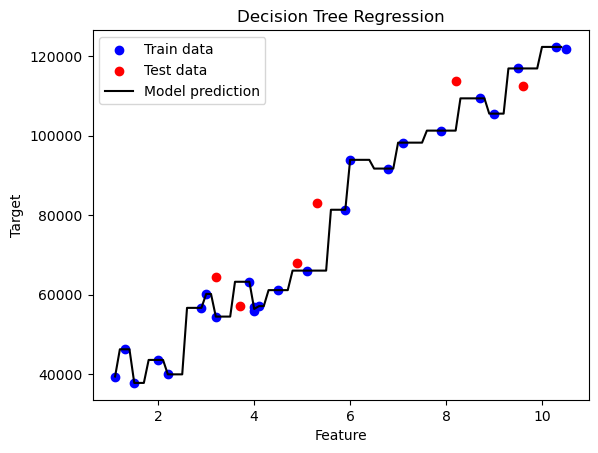

In [19]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

y_test_pred = dt_reg.predict(X_test)

print(
    f"Decision Tree | "
    f"MSE: {mean_squared_error(y_test, y_test_pred):.2f}, "
    f"R2: {r2_score(y_test, y_test_pred):.2f}"
)

plot_regression_results(X_train,
                        y_train,
                        X_test,
                        y_test,
                        dt_reg,
                        "Decision Tree Regression",
                        save_path="../images/DecisionTreeRegression.png")


Random Forest | MSE: 84019756.92, R2: 0.84
Plot saved to ../images/RandomForestRegression.png


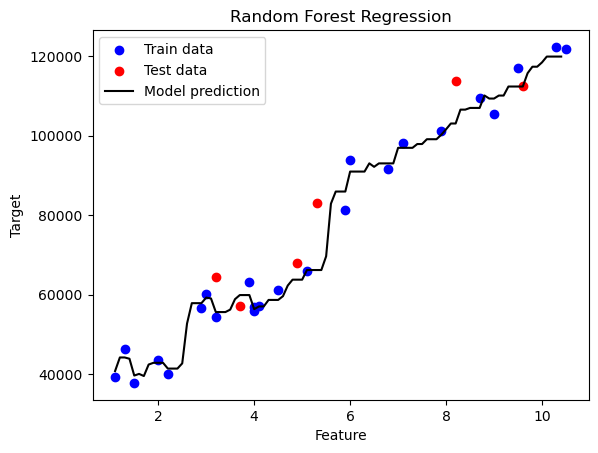

In [20]:
rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)
rf_reg.fit(X_train, y_train)

y_test_pred = rf_reg.predict(X_test)

print(
    f"Random Forest | "
    f"MSE: {mean_squared_error(y_test, y_test_pred):.2f}, "
    f"R2: {r2_score(y_test, y_test_pred):.2f}"
)

plot_regression_results(X_train,
                        y_train,
                        X_test,
                        y_test,
                        rf_reg,
                        "Random Forest Regression",
                        save_path="../images/RandomForestRegression.png")